In [2]:
import pandas as pd
import numpy as np
import os

file_list = [file for file in os.listdir('./Sales Data/Sales_Data')]
all_months_data = pd.DataFrame()

for file in file_list:
    df = pd.read_csv('./Sales Data/Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data,df])

#concatenation of all the 12 DataFrames for respective months

In [3]:
all_months_data.dropna(inplace = True)
all_months_data.reset_index(drop = True,inplace = True)
#removing nan values

In [6]:
all_months_data['Price Each'] = all_months_data['Price Each'].astype(float,errors = "ignore")
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered'], errors='coerce')
all_months_data.dropna(inplace = True)
#Converting Price Each and Quantity Ordered columns of the DataFrame from strings to float

Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [10]:
all_months_data['Sales'] = all_months_data['Price Each'] * all_months_data['Quantity Ordered']
all_months_data.head()
#adding a new column Sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
1,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
2,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
3,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


In [11]:
#adding a new columns City from Purchase Address

all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,Dallas
1,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,Boston
2,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles
3,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles


In [52]:
city_max = all_months_data.groupby('City',as_index = False).sum()
# city_max.reset_index()
city_max

,City,Quantity Ordered,Price Each,Sales
0,Atlanta,16602.0,2.779908e+06,2.795499e+06
1,Austin,11153.0,1.809874e+06,1.819582e+06
2,Boston,22528.0,3.637410e+06,3.661642e+06
3,Dallas,16730.0,2.752628e+06,2.767975e+06
4,Los Angeles,33289.0,5.421435e+06,5.452571e+06
5,New York City,27932.0,4.635371e+06,4.664317e+06
6,Portland,14053.0,2.307747e+06,2.320491e+06
7,San Francisco,50239.0,8.211462e+06,8.262204e+06
8,Seattle,16553.0,2.733296e+06,2.747755e+06


In [53]:
city_max = city_max.sort_values(by = 'City')
city_max

,City,Quantity Ordered,Price Each,Sales
0,Atlanta,16602.0,2.779908e+06,2.795499e+06
1,Austin,11153.0,1.809874e+06,1.819582e+06
2,Boston,22528.0,3.637410e+06,3.661642e+06
3,Dallas,16730.0,2.752628e+06,2.767975e+06
4,Los Angeles,33289.0,5.421435e+06,5.452571e+06
5,New York City,27932.0,4.635371e+06,4.664317e+06
6,Portland,14053.0,2.307747e+06,2.320491e+06
7,San Francisco,50239.0,8.211462e+06,8.262204e+06
8,Seattle,16553.0,2.733296e+06,2.747755e+06


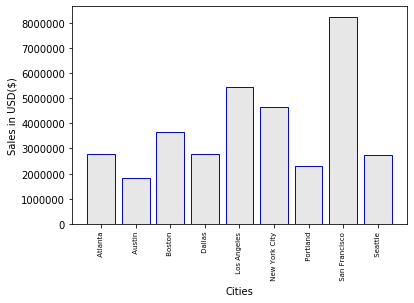

In [60]:
import matplotlib.pyplot as plt

cities = city_max['City'].unique()
# cities = [city for city in all_months_data.groupby('City')]

plt.bar(cities,city_max['Sales'],color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
plt.xticks(cities,rotation = "vertical",size = 7)
plt.xlabel('Cities')
plt.ylabel('Sales in USD($)')
plt.show()
